In [14]:
import numpy as np
from sklearn import preprocessing, model_selection, neighbors
import pandas as pd

In [15]:
df = pd.read_csv("breast-cancer-wisconsin.data.txt")

In [16]:
df.replace('?', -99999, inplace= True)
df.drop(['id'], 1, inplace = True)

In [17]:
X = np.array(df.drop(['class'], 1))
y = np.array(df['class'])

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.2)

In [18]:
clf = neighbors.KNeighborsClassifier()
clf.fit(X_train, y_train)

accuracy = clf.score(X_test, y_test)
print(accuracy)

0.9642857142857143


In [19]:
example_measures = np.array([4,2,1,1,1,2,3,2,1])
example_measures = example_measures.reshape(1, -1)

prediction = clf.predict(example_measures)
print(prediction)

[2]


In [7]:
print(len(example_measures))

1


Euclidean Distance

In [2]:
from math import sqrt
p = [1,3]
q = [2,5]

euclidean_distance = sqrt( (p[0]-q[0])**2 + (p[1]-q[1])**2)

print(euclidean_distance)

2.23606797749979


Building the Algorithm

In [3]:
import numpy as np
from math import sqrt
import matplotlib.pyplot as plt
from matplotlib import style
import warnings 
from collections import Counter
style.use('fivethirtyeight')

In [1]:
dataset = {
    'k':[ [1,2], [2,3], [3,1] ],
    'r':[ [6,5], [7,7], [8,6] ]
}
new_features = [5,7]

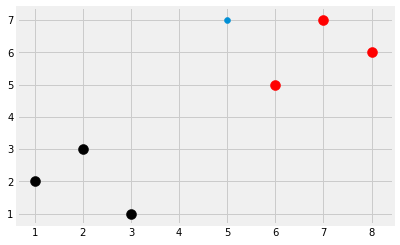

In [8]:
for i in dataset:
    for ii in dataset[i]:
        plt.scatter(ii[0], ii[1], s=100, color=i)
plt.scatter(new_features[0], new_features[1] )
    

Functions in K Nearest Neighbors

In [9]:
def k_nearest_neighbors(data, predict, k=3):
    if len(data) >= k:
        warnings.warn("K is a set to a value less than total voting groups")
    distances = []
    for group in data:
        for features in data[group]:
            euclidean_distance = np.linalg.norm(np.array(features)- np.array(predict))
            distances.append([euclidean_distance, group])
            
    votes = [i[1] for i in sorted(distances)[:k]]
    #print (Counter(votes).most_common(1))

    vote_result = Counter(votes).most_common(1)[0][0]
    confidence = Counter(votes).most_common(1)[0][1] / k
    #print(vote_result, confidence)
    return vote_result, confidence

In [10]:
result = k_nearest_neighbors(dataset, new_features, k=3)

[('r', 3)]


In [2]:
import numpy as np
from math import sqrt
import warnings
from collections import Counter
import pandas as pd
import random

In [3]:
df = pd.read_csv("breast-cancer-wisconsin.data.txt")

df.replace('?', -99999, inplace= True)
df.drop(['id'], 1, inplace = True)
full_data = df.astype(float).values.tolist()
random.shuffle(full_data)


In [11]:
test_size = 0.4
train_set = {2:[], 4:[]}
test_set =  {2:[], 4:[]}
train_data = full_data[:-int(test_size*len(full_data) )]
test_data = full_data[-int(test_size*len(full_data) ):]

In [12]:
for i in train_data:
    train_set[i[-1]].append(i[:-1])

for i in test_data:
    test_set[i[-1]].append(i[:-1])

In [13]:
correct = 0
total = 0

for group in test_set:
    for data in test_set[group]:
        vote, confidence = k_nearest_neighbors(train_set, data, k=5)
        if group == vote:
            correct += 1
        else:
            print(confidence)
        total += 1

print("Accuracy :", correct/total)

0.8
1.0
1.0
1.0
1.0
0.6
0.6
0.6
0.6
0.6
Accuracy : 0.96415770609319
